# MovieLens Dataset Analysis

In [2]:
"""
Created on  Mon June 29 10:45:33 2020

@author: Muhammad Imran Shaikh
"""

'\nCreated on  Mon June 29 10:45:33 2020\n\n@author: Muhammad Imran Shaikh\n'

#### Import Libraries

In [26]:
import pandas as pd # pandas is a data manipulation library
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
import random 
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS #used to generate world cloud

In [2]:
# lets explore movies.csv
data= pd.read_csv("C:/Users/Imran/Desktop/Thesis coding/New_Coding/ml-latest-small/movies.csv" )
data.shape

(9125, 3)

In [3]:
data.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
movieId    9125 non-null int64
title      9125 non-null object
genres     9125 non-null object
dtypes: int64(1), object(2)
memory usage: 213.9+ KB


In [5]:
movies = data['movieId'].unique().tolist()
len(movies)

9125

In [6]:
ratings_data = pd.read_csv("C:/Users/Imran/Desktop/Recommender Systems/ml-latest-small/ratings.csv" )
ratings_data.shape
len(ratings_data['userId'].unique().tolist())

671

In [7]:
ratings_data.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [8]:
# Defining rattings
mini = ratings_data['rating'].min() 
maxi = ratings_data['rating'].max()

print('minimum rating = ',mini )
print('maximum rating = ',maxi )


minimum rating =  0.5
maximum rating =  5.0


#### Cleaning data

In [9]:
data.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [10]:
ratings_data.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

### Analysis and Data preprocessing of data

In [11]:
# filtering to get the list of drama movies
drama_movies=data['genres'].str.contains('Drama')
data[drama_movies].head()

,movieId,title,genres
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
13,14,Nixon (1995),Drama
15,16,Casino (1995),Crime|Drama
16,17,Sense and Sensibility (1995),Drama|Romance


In [12]:
data[drama_movies].shape

(4365, 3)

In [13]:
# filtering to get the list of Comedy movies
comedy_movies = data['genres'].str.contains('Comedy')
data[comedy_movies].head()
data[comedy_movies].shape

(3315, 3)

In [14]:
del ratings_data['timestamp']

In [15]:
#displays first 5 data from a dataframe
#here ratings.csv has 3 columns
ratings_data.head() 

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


### Merging Rating and Movies table based on movies ids with inner join

In [16]:
#merging two dataframes "movies.csv" and "ratings.csv"
movie_data_ratings_data=data.merge(ratings_data,on = 'movieId',how = 'inner')
movie_data_ratings_data.head(3)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0


In [17]:
#displays 20 high rated movies
high_rated= movie_data_ratings_data['rating']>4.0
movie_data_ratings_data[high_rated].head(20)

,movieId,title,genres,userId,rating
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,26,5.0
12,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,47,5.0
16,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,63,5.0
19,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,69,5.0
20,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,70,5.0
22,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,73,5.0
29,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,89,5.0
31,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,91,5.0
32,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,92,5.0


In [18]:
# displays low rated movies
low_rated = movie_data_ratings_data['rating']<4.0
movie_data_ratings_data[low_rated].head(10)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,20,3.5
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,23,3.0
14,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,55,3.0
17,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,67,3.0
21,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,72,3.5
23,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,75,3.0
25,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,79,2.0


In [19]:
#total number of unique movie genre
unique_genre=data['genres'].unique().tolist()
len(unique_genre)

902

In [20]:
#top 25 most rated movies
m_rated = movie_data_ratings_data.groupby(['title'])[['rating']].sum()
high_rated=m_rated.nlargest(25,'rating')
high_rated.head(25)

,rating
title,
"Shawshank Redemption, The (1994)",1395.5
Forrest Gump (1994),1382.5
Pulp Fiction (1994),1379.0
"Silence of the Lambs, The (1991)",1258.0
Star Wars: Episode IV - A New Hope (1977),1228.5
"Matrix, The (1999)",1083.5
Schindler's List (1993),1050.0
Jurassic Park (1993),1015.5
Star Wars: Episode V - The Empire Strikes Back (1980),990.5


In [21]:
# here we extract year from title
data['year'] =data['title'].str.extract('.*\((.*)\).*',expand = False)
data.head(5)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [22]:
#define a function that counts the number of times each genre appear:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [23]:
#here we  make census of the genres:
genre_labels = set()
for s in data['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [24]:
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(data, 'genres', genre_labels)
keyword_occurences

[['Drama', 4365],
 ['Comedy', 3315],
 ['Thriller', 1729],
 ['Romance', 1545],
 ['Action', 1545],
 ['Adventure', 1117],
 ['Crime', 1100],
 ['Horror', 877],
 ['Sci-Fi', 792],
 ['Fantasy', 654],
 ['Children', 583],
 ['Mystery', 543],
 ['Documentary', 495],
 ['Animation', 447],
 ['Musical', 394],
 ['War', 367],
 ['Western', 168],
 ['IMAX', 153],
 ['Film-Noir', 133],
 ['(no genres listed)', 18]]

## Data Visualization

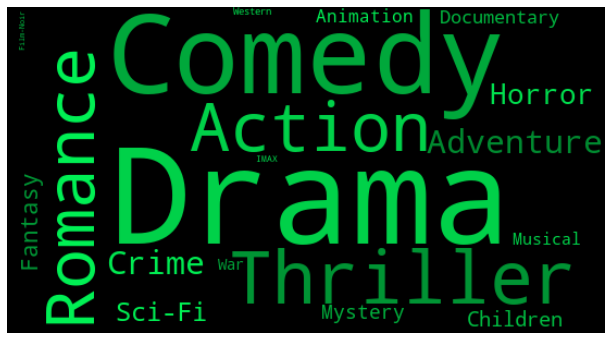

In [30]:
# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


#Finally, the result is shown as a wordcloud:
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

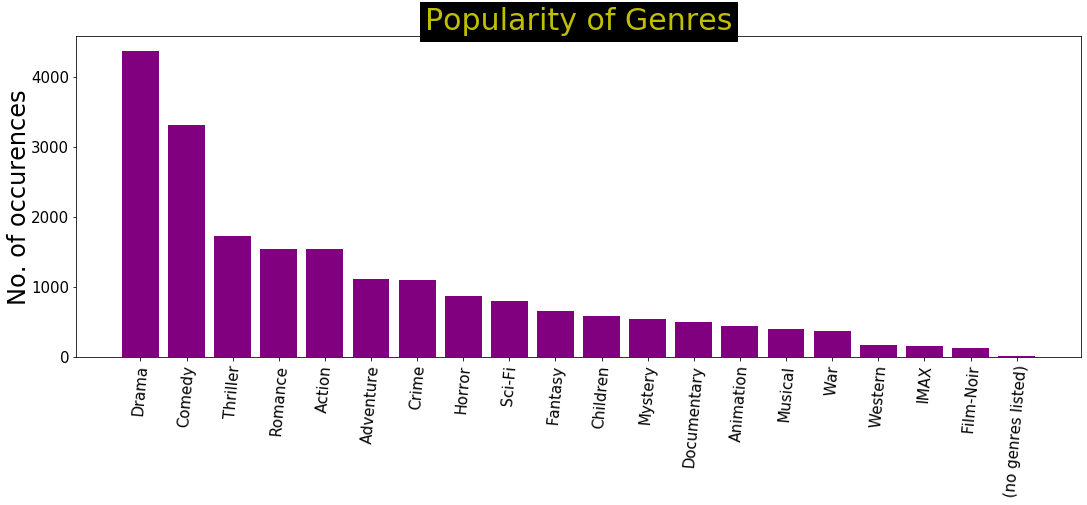

In [35]:
# lets display the same result in the histogram for popular genres count
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color = 'Purple')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='Y',fontsize = 30)
plt.show()

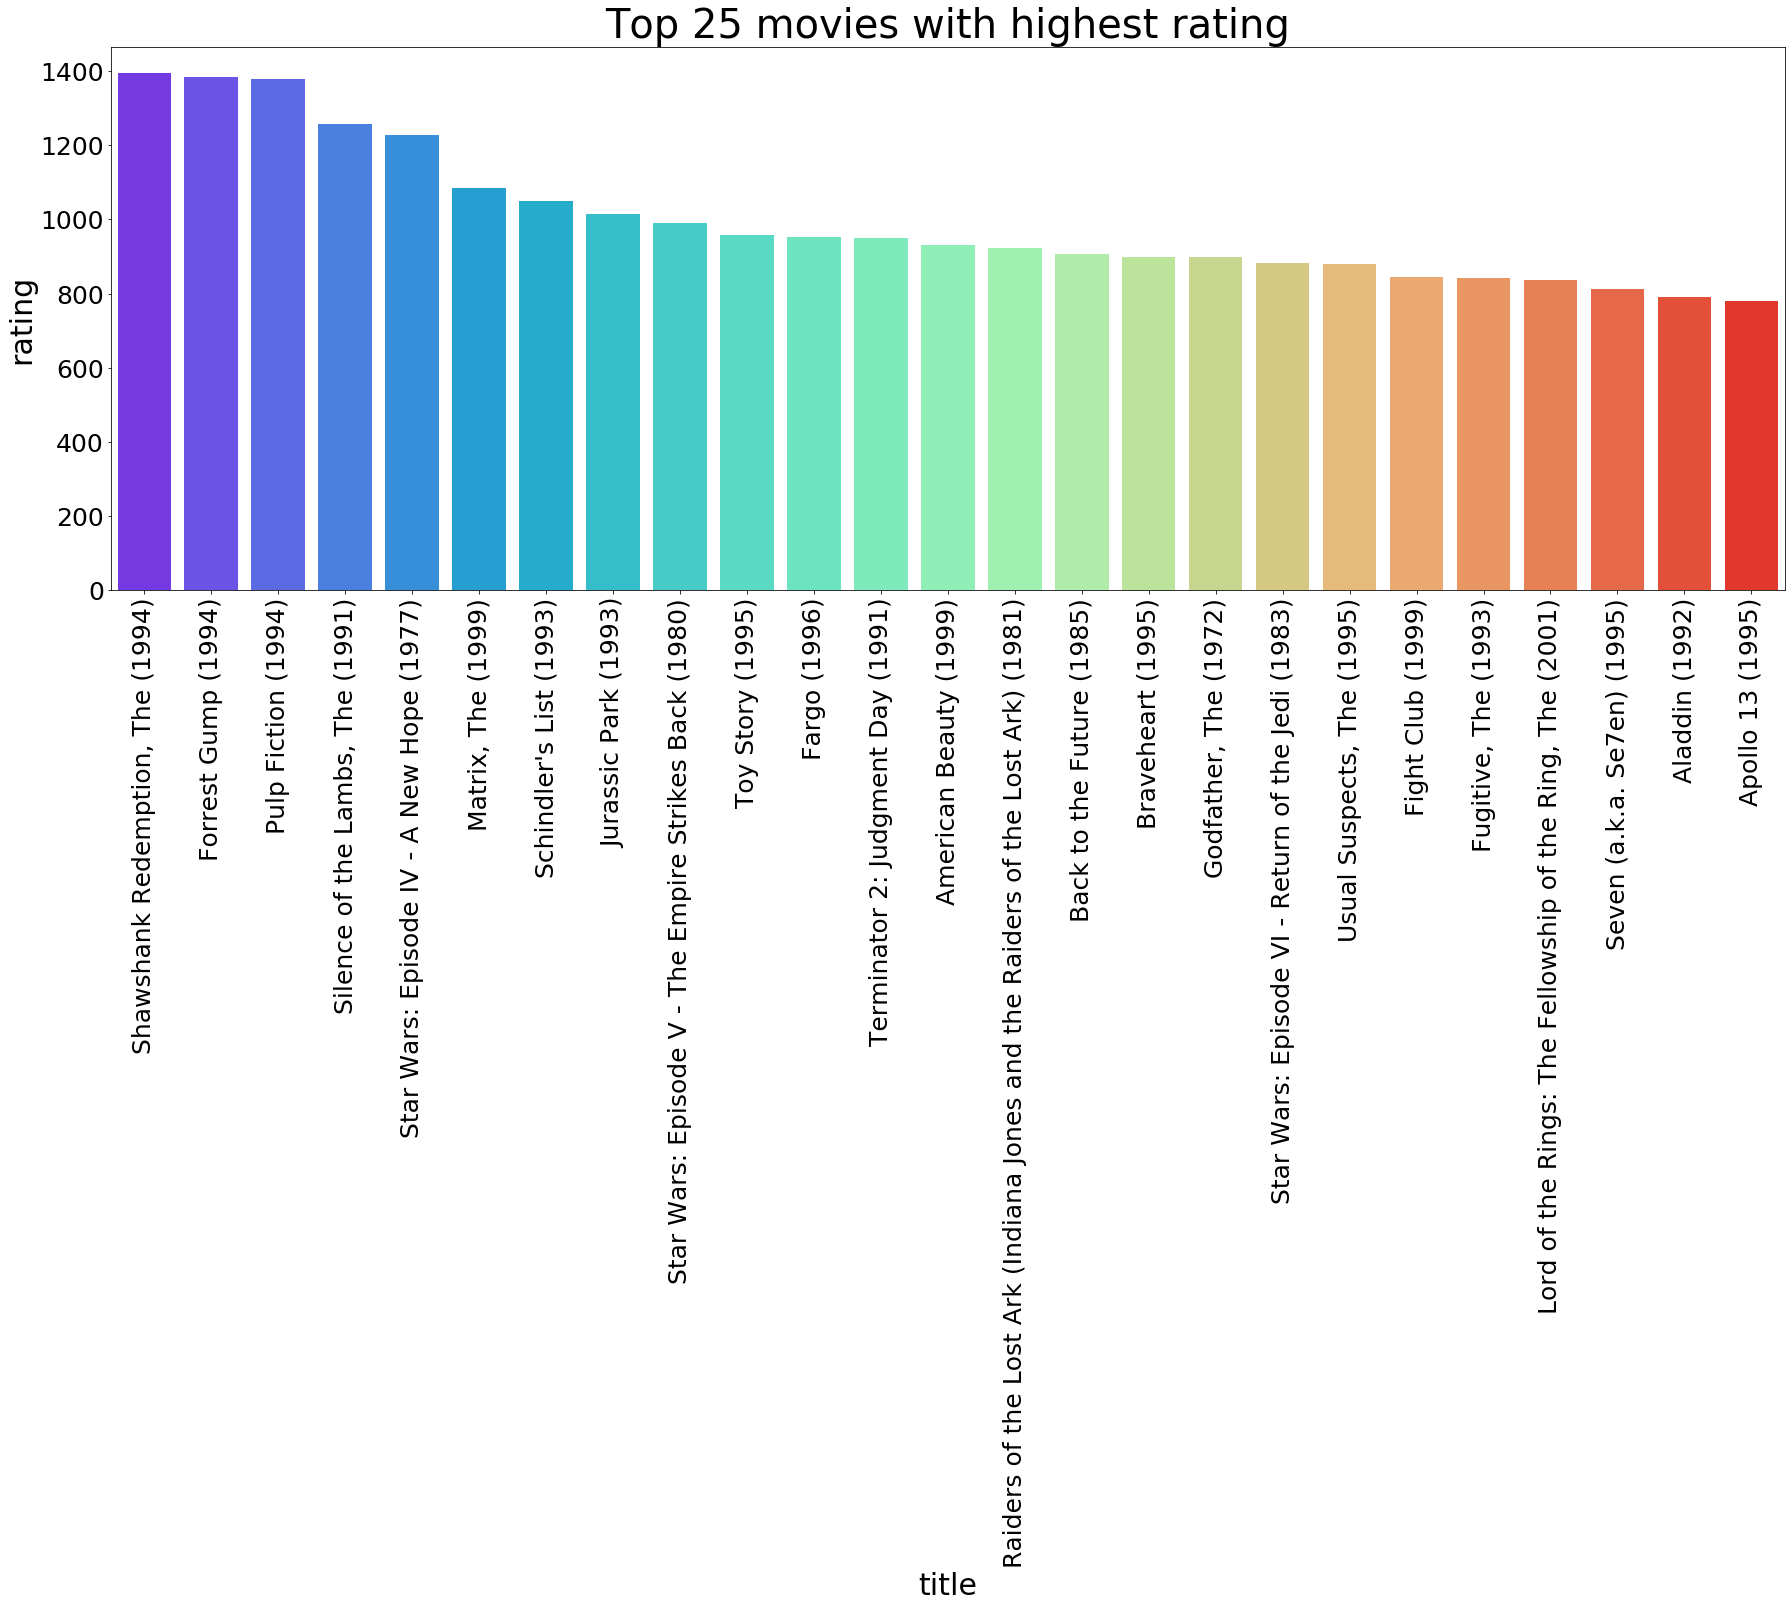

In [28]:
# Ploting Highest rated movies
plt.figure(figsize=(30,10))
plt.title('Top 25 movies with highest rating',fontsize=40)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
sns.barplot(x=high_rated.index,y=high_rated.rating,palette='rainbow')